<a href="https://colab.research.google.com/github/ravidas07/DeepLearning/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
X = df.drop(columns=['id','loan_status'])
Y = df[['loan_status']]

In [5]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [6]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [7]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [9]:
num_pipe = make_pipeline(
    SimpleImputer (strategy='mean'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer (strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)



In [10]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform='pandas')

In [11]:
X_pre = pre.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [13]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
49371,0.074446,-0.264855,0.075506,0.140632,0.926666,0.335502,1.039036,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
33104,-0.754307,-0.923845,0.580588,-0.758041,0.023767,0.117378,-0.698298,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53030,0.571697,0.156966,-0.177035,0.931464,-0.253034,0.444564,0.790845,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54909,-0.091305,-0.370311,-0.177035,-0.578306,1.091428,-0.427932,0.294464,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27249,0.571697,-0.370311,0.075506,0.050765,-0.009185,0.335502,0.294464,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
ytrain.head()

,loan_status
49371,0
33104,1
53030,0
54909,0
27249,0


In [15]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
40062,-0.920057,0.288785,0.328047,1.039305,-0.921970,0.444564,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30128,-1.085808,-0.818495,0.075506,-1.117510,0.267616,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34643,1.731951,1.475156,-0.429576,1.039305,1.124381,-0.318870,2.031798,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39635,-0.422806,1.527884,-1.187200,0.500101,-1.116389,-0.646056,-0.450108,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32787,-1.085808,-1.055770,-0.682117,0.140632,2.172270,2.843926,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
ytest.head()

,loan_status
40062,0
30128,0
34643,0
39635,0
32787,1


In [17]:
xtrain.shape

(46916, 26)

In [18]:
xtest.shape

(11729, 26)

In [19]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout

In [20]:
#Initilize neural network
model = Sequential()

#Add Input layer
model.add(Input( shape=(xtrain.shape[1],) ))

#Add Dense layer
model.add(Dense(units = 32, activation="relu"))

#Dropout layer 1
model.add(Dropout(rate = 0.3))

#Add Dense layer 2
model.add(Dense(units = 16, activation="relu"))

#Dropout layer 2
model.add(Dropout(rate = 0.2))

#Add output layer with sigmoid activation
model.add(Dense(units = 1, activation="sigmoid"))



In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [24]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8599 - loss: 0.3651 - val_accuracy: 0.9218 - val_loss: 0.2218
Epoch 2/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9140 - loss: 0.2441 - val_accuracy: 0.9330 - val_loss: 0.2047
Epoch 3/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9277 - loss: 0.2165 - val_accuracy: 0.9385 - val_loss: 0.1962
Epoch 4/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9324 - loss: 0.2092 - val_accuracy: 0.9403 - val_loss: 0.1920
Epoch 5/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9364 - loss: 0.2035 - val_accuracy: 0.9416 - val_loss: 0.1906
Epoch 6/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9375 - loss: 0.1979 - val_accuracy: 0.9444 - val_loss: 0.1882
Epoch 7/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9382 - loss: 0.2022 - val_accuracy: 0.9446 - val_loss: 0.1871
Epoch 8/60
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9404 - loss: 0.1958 -

In [25]:
import matplotlib.pyplot as plt

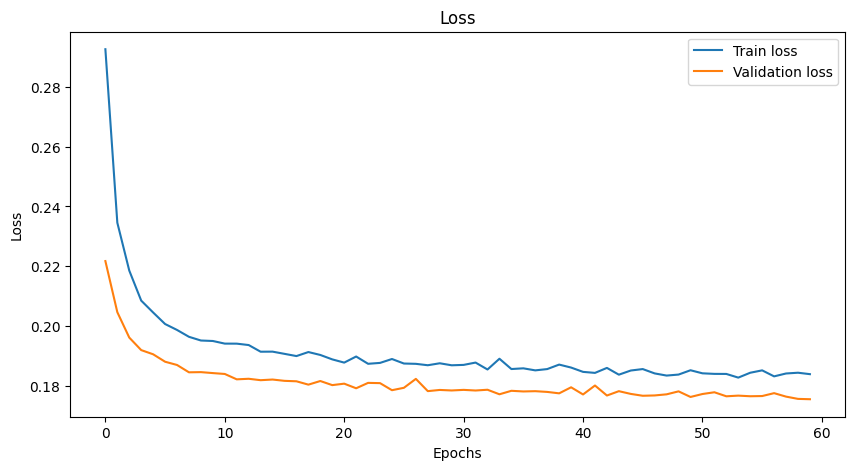

In [26]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'],label = "Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

In [27]:
model.evaluate(xtrain, ytrain)

1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9489 - loss: 0.1750


[0.1717594563961029, 0.9499104619026184]

In [28]:
model.evaluate(xtest, ytest)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9534 - loss: 0.1617


[0.17349207401275635, 0.949271023273468]